In [78]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import operator

%matplotlib inline

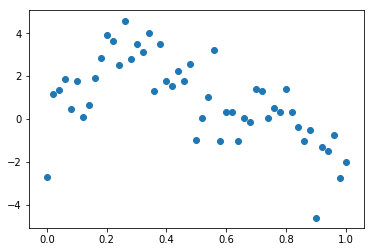

In [17]:
x = np.linspace(0,1,51) #select variables
y = []
for i in x:
    func_x = 1 + (2 * math.sin(5*i)) - math.sin(15 * i)
    func_y = func_x + random.gauss( 0, 1)
    y.append(func_y)
    
plt.scatter(x, y); #plot our simulated data

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
X = x[:, np.newaxis]

In [27]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
model.coef_[0]

-3.626519388856446

In [29]:
model.intercept_

2.685972343079803

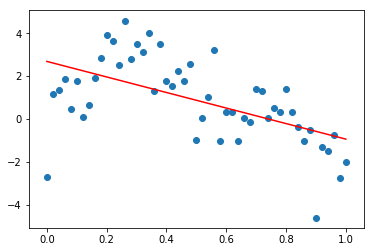

In [32]:
x1 = np.linspace(0, 1, 100)
plt.scatter(x, y)
plt.plot(x1, (model.intercept_ + (model.coef_[0]*x1)), color = 'red')

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
yn = np.asarray(y)

In [72]:
Y = yn[:, np.newaxis]

In [74]:
model1 = PolynomialFeatures(degree=7)
X_poly = model1.fit_transform(X)

In [76]:
model.fit(X_poly,Y)
y_poly_pred = model.predict(X_poly)

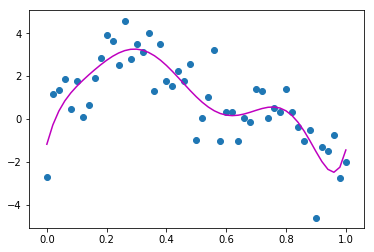

In [81]:
plt.scatter(x, y)

plt.plot(x, y_poly_pred, color='m')
plt.show()